In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('uber_carpoolservice.csv')
df2 = pd.read_csv('lyft_carpoolservice.csv')

In [3]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df1 = df1.set_index(pd.DatetimeIndex(df1['date_time']))
df2 = df2.set_index(pd.DatetimeIndex(df1['date_time']))

In [5]:
df2.lyft_max_estimate = (df2.lyft_max_estimate).divide(100)
df2.lyft_min_estimate = (df2.lyft_min_estimate).divide(100)

In [6]:
df1['y'] = (df1['uber_max_estimate'] + df1['uber_min_estimate'])/2
df2['y'] = (df2['lyft_max_estimate'] + df2['lyft_min_estimate'])/2

In [7]:
df1.rename(columns={"date_time": "ds"},inplace=True)
df2.rename(columns={"date_time": "ds"},inplace=True)

In [8]:
df1['uber_price_per_second'] = df1.y/df1.uber_duration
df1['uber_price_per_second']

date_time
2018-02-25 00:00:00    0.020370
2018-02-25 00:01:00    0.019048
2018-02-25 00:02:00    0.020833
2018-02-25 00:03:00    0.018519
2018-02-25 00:04:00    0.018519
2018-02-25 00:05:00    0.020833
2018-02-25 00:06:00    0.018182
2018-02-25 00:07:00    0.018333
2018-02-25 00:08:00    0.021429
2018-02-25 00:09:00    0.018519
2018-02-25 00:10:00    0.018519
2018-02-25 00:11:00    0.019048
2018-02-25 00:12:00    0.013889
2018-02-25 00:13:00    0.020833
2018-02-25 00:14:00    0.018519
2018-02-25 00:15:00    0.017593
2018-02-25 00:16:00    0.021429
2018-02-25 00:17:00    0.018182
2018-02-25 00:18:00    0.021429
2018-02-25 00:19:00    0.015278
2018-02-25 00:20:00    0.018333
2018-02-25 00:21:00    0.014583
2018-02-25 00:22:00    0.016667
2018-02-25 00:23:00    0.017708
2018-02-25 00:24:00    0.016667
2018-02-25 00:25:00    0.013542
2018-02-25 00:26:00    0.016667
2018-02-25 00:27:00    0.025000
2018-02-25 00:28:00    0.025000
2018-02-25 00:29:00    0.028125
                         ...  

In [9]:
df2['lyft_price_per_second'] = df2.y/df2.lyft_duration
df2['lyft_price_per_second']

date_time
2018-02-25 00:00:00    0.004725
2018-02-25 00:01:00    0.005229
2018-02-25 00:02:00    0.010142
2018-02-25 00:03:00    0.004855
2018-02-25 00:04:00    0.007679
2018-02-25 00:05:00    0.004937
2018-02-25 00:06:00    0.008138
2018-02-25 00:07:00    0.009482
2018-02-25 00:08:00    0.005970
2018-02-25 00:09:00    0.005113
2018-02-25 00:10:00    0.004992
2018-02-25 00:11:00    0.005283
2018-02-25 00:12:00    0.004000
2018-02-25 00:13:00    0.004710
2018-02-25 00:14:00    0.004336
2018-02-25 00:15:00    0.005049
2018-02-25 00:16:00    0.005430
2018-02-25 00:17:00    0.006610
2018-02-25 00:18:00    0.005143
2018-02-25 00:19:00    0.006592
2018-02-25 00:20:00    0.004227
2018-02-25 00:21:00    0.004640
2018-02-25 00:22:00    0.006972
2018-02-25 00:23:00    0.010234
2018-02-25 00:24:00    0.005346
2018-02-25 00:25:00    0.005100
2018-02-25 00:26:00    0.007564
2018-02-25 00:27:00    0.004838
2018-02-25 00:28:00    0.006623
2018-02-25 00:29:00    0.011605
                         ...  

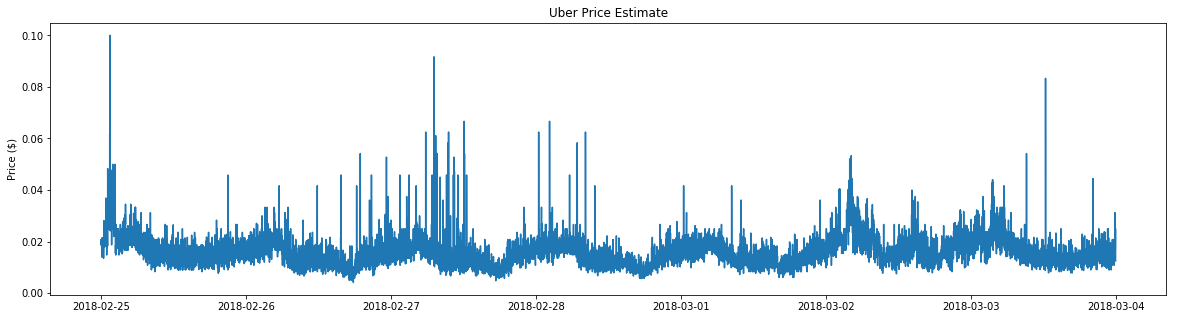

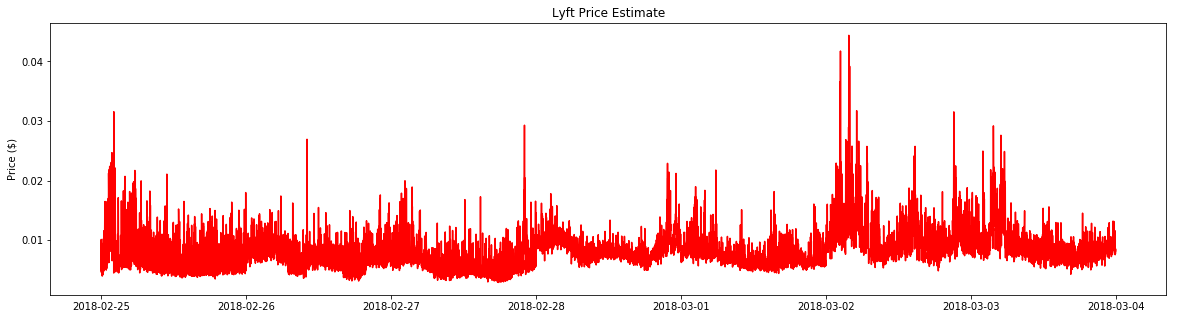

In [10]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.plot(df1.index, df1['uber_price_per_second'])
plt.title('Uber Price Estimate')
plt.ylabel('Price ($)')
plt.show()

plt.plot(df2.index, df2['lyft_price_per_second'], 'r')
plt.title('Lyft Price Estimate')
plt.ylabel('Price ($)')
plt.show()

In [11]:
# Merge the two datasets
df = df1.merge(df2, how='inner', on='ds')

In [12]:
# Select only the relevant columns
df = df.ix[:, ['ds', 'uber_price_per_second', 'lyft_price_per_second']]

df.head()

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,ds,uber_price_per_second,lyft_price_per_second
0,2/25/2018 0:00,0.020370,0.004725
1,2/25/2018 0:01,0.019048,0.005229
2,2/25/2018 0:02,0.020833,0.010142
3,2/25/2018 0:03,0.018519,0.004855
4,2/25/2018 0:04,0.018519,0.007679


In [13]:
df.ds = pd.to_datetime(df.ds)

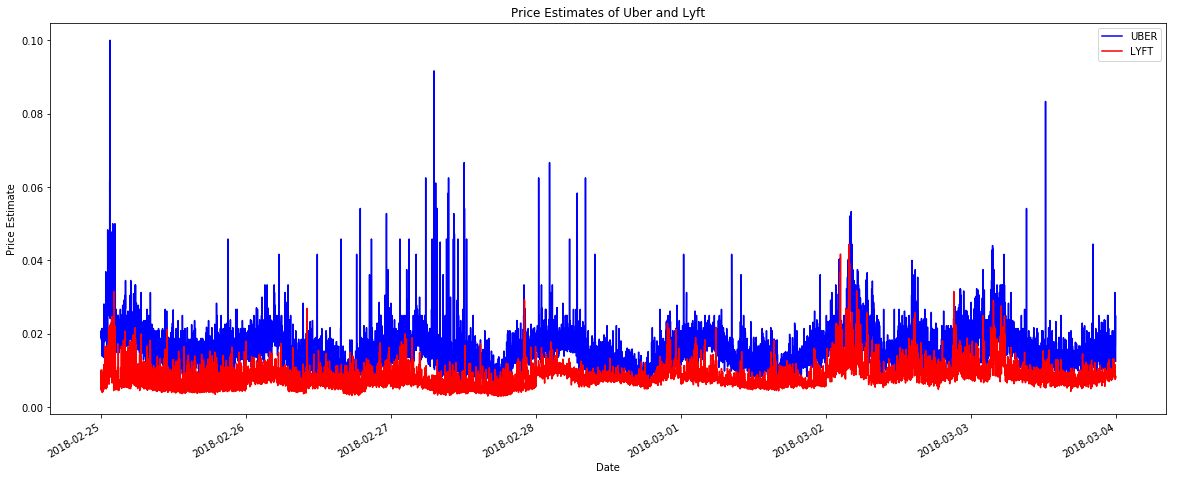

In [14]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(df['ds'], df['uber_price_per_second'], 'b-', label = 'UBER')
plt.plot(df['ds'], df['lyft_price_per_second'], 'r-', label = 'LYFT')
plt.xlabel('Date')
plt.ylabel('Price Estimate')
plt.title('Price Estimates of Uber and Lyft')
plt.gcf().autofmt_xdate()
plt.legend()

In [15]:
df1 = df[['ds', 'uber_price_per_second']]

In [16]:
df2 = df[['ds', 'lyft_price_per_second']]

In [31]:
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [32]:
TS = np.array(df1['uber_price_per_second'])
num_periods = 100
f_horizon = 1

x_data = TS[:(len(TS)-(len(TS) % num_periods))]
x_batches = x_data.reshape(-1, 100, 1)

y_data = TS[1:(len(TS)-(len(TS) % num_periods)) + f_horizon]
y_batches = y_data.reshape(-1, 100, 1)
print(len(x_batches))
print(x_batches.shape)
print(x_batches[0:2])

print(y_batches[0:1])
print(y_batches.shape)

99
(99, 100, 1)
[[[0.02037037]
  [0.01904762]
  [0.02083333]
  [0.01851852]
  [0.01851852]
  [0.02083333]
  [0.01818182]
  [0.01833333]
  [0.02142857]
  [0.01851852]
  [0.01851852]
  [0.01904762]
  [0.01388889]
  [0.02083333]
  [0.01851852]
  [0.01759259]
  [0.02142857]
  [0.01818182]
  [0.02142857]
  [0.01527778]
  [0.01833333]
  [0.01458333]
  [0.01666667]
  [0.01770833]
  [0.01666667]
  [0.01354167]
  [0.01666667]
  [0.025     ]
  [0.025     ]
  [0.028125  ]
  [0.01818182]
  [0.01805556]
  [0.02407407]
  [0.0219697 ]
  [0.01785714]
  [0.01875   ]
  [0.01851852]
  [0.02583333]
  [0.02083333]
  [0.01818182]
  [0.01875   ]
  [0.02685185]
  [0.02083333]
  [0.02083333]
  [0.0202381 ]
  [0.01904762]
  [0.02261905]
  [0.03690476]
  [0.02380952]
  [0.03257576]
  [0.02291667]
  [0.03095238]
  [0.0202381 ]
  [0.01833333]
  [0.03055556]
  [0.02361111]
  [0.01481481]
  [0.0212963 ]
  [0.01851852]
  [0.03055556]
  [0.03181818]
  [0.01794872]
  [0.03055556]
  [0.02619048]
  [0.02222222]
  [0.0183

In [33]:
def test_data(series, forecast, num_periods):
    test_x_setup = TS[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, 100, 1)
    testY = TS[-(num_periods):].reshape(-1, 100, 1)
    return testX, testY

X_test, Y_test = test_data(TS, f_horizon, num_periods)
print(X_test.shape)
print(X_test)

(1, 100, 1)
[[[0.01481481]
  [0.01805556]
  [0.01666667]
  [0.01203704]
  [0.01875   ]
  [0.01089744]
  [0.01410256]
  [0.00984848]
  [0.01547619]
  [0.01180556]
  [0.01083333]
  [0.01203704]
  [0.01527778]
  [0.01416667]
  [0.00972222]
  [0.01515152]
  [0.02037037]
  [0.01574074]
  [0.01309524]
  [0.01875   ]
  [0.01547619]
  [0.025     ]
  [0.01145833]
  [0.01203704]
  [0.025     ]
  [0.01547619]
  [0.01666667]
  [0.01833333]
  [0.01666667]
  [0.01785714]
  [0.02142857]
  [0.02142857]
  [0.01666667]
  [0.01388889]
  [0.01388889]
  [0.00897436]
  [0.01547619]
  [0.01145833]
  [0.01547619]
  [0.01083333]
  [0.01203704]
  [0.01212121]
  [0.00984848]
  [0.01666667]
  [0.0125    ]
  [0.01875   ]
  [0.01555556]
  [0.01944444]
  [0.01904762]
  [0.01666667]
  [0.01944444]
  [0.01875   ]
  [0.01904762]
  [0.01488095]
  [0.01851852]
  [0.01602564]
  [0.00902778]
  [0.01309524]
  [0.01547619]
  [0.01736111]
  [0.01833333]
  [0.01666667]
  [0.01851852]
  [0.01904762]
  [0.01875   ]
  [0.01083333

In [34]:
tf.reset_default_graph()

num_periods = 100
inputs = 1
hidden = 500
output = 1

X = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

basic_cell = tf.contrib.rnn.LSTMCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

learning_rate = 0.001

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [35]:
epochs = 1000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(ep, '\tMSE:', mse)
            
    y_pred = sess.run(outputs, feed_dict={X: X_test})
    print(y_pred)

0 	MSE: 0.34242293
100 	MSE: 0.21326339
200 	MSE: 0.2057187
300 	MSE: 0.200235
400 	MSE: 0.20088361
500 	MSE: 0.19875638
600 	MSE: 0.19778222
700 	MSE: 0.19734532
800 	MSE: 0.19691272
900 	MSE: 0.19648366
[[[0.01554005]
  [0.01667216]
  [0.01676146]
  [0.01599253]
  [0.01607998]
  [0.01532335]
  [0.0150439 ]
  [0.01436657]
  [0.01441924]
  [0.01410821]
  [0.0137403 ]
  [0.01355452]
  [0.01375655]
  [0.01384915]
  [0.01346227]
  [0.01368224]
  [0.01439267]
  [0.01459992]
  [0.0145135 ]
  [0.01498938]
  [0.01510154]
  [0.0160994 ]
  [0.01565931]
  [0.01530313]
  [0.01624895]
  [0.01620725]
  [0.01628817]
  [0.01652639]
  [0.01657825]
  [0.01674093]
  [0.01723398]
  [0.01768361]
  [0.01762436]
  [0.01725872]
  [0.01691369]
  [0.01603872]
  [0.01595635]
  [0.01544989]
  [0.01543421]
  [0.01492886]
  [0.01460416]
  [0.01432985]
  [0.0138445 ]
  [0.01411757]
  [0.01396556]
  [0.01445004]
  [0.01459571]
  [0.01510547]
  [0.01553519]
  [0.01569315]
  [0.01610526]
  [0.01641132]
  [0.01671603]


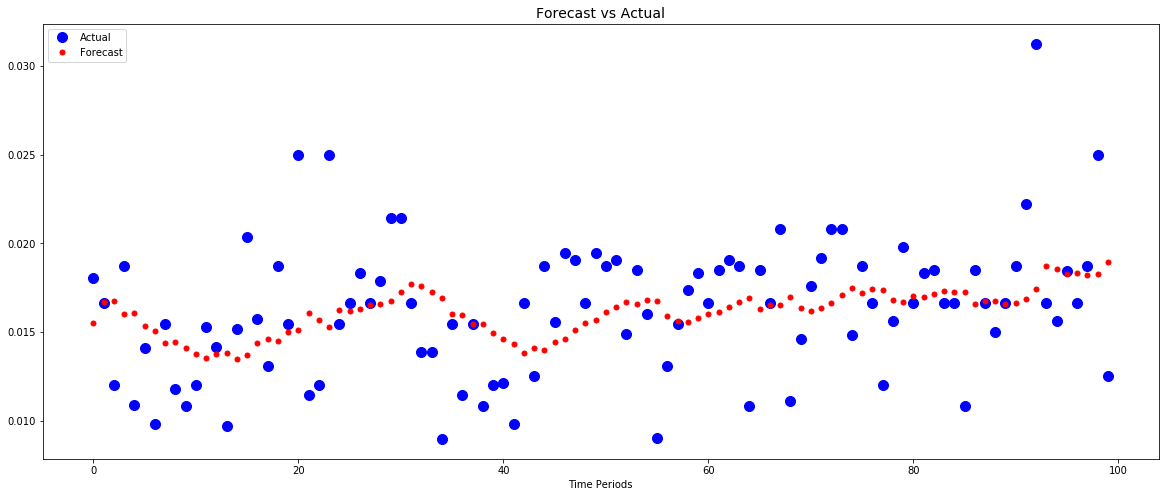

In [36]:
plt.title('Forecast vs Actual', fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), 'bo', markersize=10, label='Actual')
plt.plot(pd.Series(np.ravel(y_pred)), 'r.', markersize=10, label='Forecast')
plt.legend(loc='upper left')
plt.xlabel('Time Periods')
plt.show()